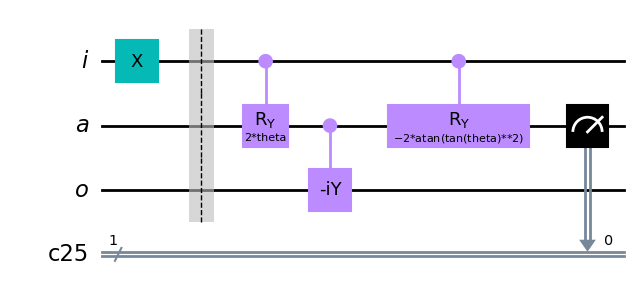

In [116]:
from qiskit import *
import numpy as np
from qiskit.extensions import UnitaryGate
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.visualization import plot_histogram

iY = [[0,-1],[1, 0]]
U = UnitaryGate(iY, label="-iY").control(1)
theta = Parameter("theta")
input = QuantumRegister(1, "i")
ancilla = QuantumRegister(1, "a")
output = QuantumRegister(1, "o")
c = ClassicalRegister(1)

QC = QuantumCircuit(input, ancilla, output, c)
QC.x(input[0])
QC.barrier()

QC.cry(2*theta, 0,1)
QC.append(U, [1,2])
QC.cry(-2*np.arctan(np.tan(theta)*np.tan(theta)), 0,1)
backend = Aer.get_backend("aer_simulator")
# QC.measure(0,0)
QC.measure(ancilla[0],c[0])
tqc = transpile(QC, backend=backend)

QC.draw(output="mpl")


input 1
input 0.39269908169872414
input 0.7853981633974483
input 1.1780972450961724
input 1.5707963267948966


/var/folders/n5/sr7wwb8n1wggd7jsk_k37l_w0000gn/T/ipykernel_17768/2627303952.py:11: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  jobs = backend.run(c, shots=1000).result().get_counts()


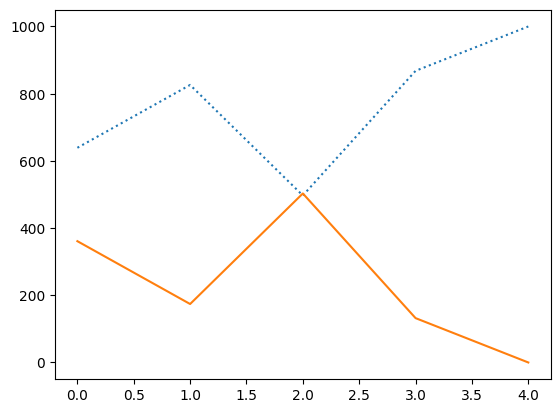

In [117]:
zero = []
one = []
angles = [1, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]

c = assemble(tqc, shots=1000, parameter_binds=[{theta: i}])
# Statevector(c)

for i in angles:
    print ("input", i)
    c = assemble(tqc, shots=1000, parameter_binds=[{theta: i}])
    jobs = backend.run(c, shots=1000).result().get_counts()
    zero.append(jobs['0'] if '0' in jobs else 0)
    one.append(jobs['1'] if '1' in jobs else 0)

import matplotlib.pyplot as plt
import numpy as np

plt.plot(zero, linestyle = 'dotted')
plt.plot(one)

plt.show()
    

In [118]:
q = QuantumRegister(2, 'q')
a = QuantumRegister(1, 'a')
c = ClassicalRegister(1, 'c')